# Covid19 - CDC - Data understanding

# 0. Preparing tools


In [1]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Set the font size for the plots, so they are more readable
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Read in data from csv file to pandas dataframe.  
# df = pd.read_csv('covid19-cdc-22201371.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)
# Write to file using default utf-8 encoding, this will avoid further issues with the encoding
# df.to_csv("covid19-cdc-22201371-utf8.csv", index=False)

# Load and merge 2 uncleaned datasets:
df1 = pd.read_csv("./data-uncleaned/covid19-cdc-22201371.csv")
df2 = pd.read_csv("./data-uncleaned/covid19-cdc-22202474.csv")
df = pd.concat([df1, df2])
df.reset_index(inplace=True, drop=True) 

# 1. Cleaning the dataset

- 1.1. Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types). 
- 1.2. Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
- 1.3. Check for constant columns, missing values and abnormal cardinality
- 1.4. Check integrity

## 1.1 Convert to appropriate data types

In [4]:
df.shape

(40000, 19)

In [5]:
# First 5 rows
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-06,FL,12.0,PALM BEACH,12099.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
1,2020-12,CA,6.0,SANTA CLARA,6085.0,65+ years,Male,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN
2,2020-11,TX,48.0,EL PASO,48141.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
3,2020-12,MN,27.0,CROW WING,27035.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Yes
4,2022-01,NJ,34.0,CAMDEN,34007.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Probable Case,Symptomatic,Yes,Missing,Yes,NaN


In [6]:
# Last 5 rows
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
39995,2022-01,KY,21.0,JEFFERSON,21111.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
39996,2020-10,MD,24.0,BALTIMORE,24005.0,18 to 49 years,Male,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
39997,2020-08,ID,16.0,BONNEVILLE,16019.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
39998,2021-11,VT,50.0,CHITTENDEN,50007.0,50 to 64 years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
39999,2022-01,VA,51.0,ALEXANDRIA CITY,51510.0,0 - 17 years,Male,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [7]:
# Initial data type
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [8]:
# Convert to correct datatype
df['state_fips_code'] = df['state_fips_code'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')
continuous_features = df.select_dtypes(['float']).columns

df['case_month'] = pd.to_datetime(df['case_month'])

In [9]:
# Select columns with object type
object_columns = df.select_dtypes(['object']).columns

# Convert data type to category for these columns
for column in object_columns:
    df[column] = df[column].astype('category')
categorical_features = df.select_dtypes(['category']).columns

### After the conversion, the features and their data types are as follow:

In [10]:
df.dtypes

case_month                         datetime64[ns]
res_state                                category
state_fips_code                          category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval           float64
case_onset_interval                       float64
process                                  category
exposure_yn                              category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
dtype: object

## 1.2. Look for duplicate rows and columns

### First, checking duplicate columns showing that there are no duplication

In [11]:
# First transpose the df so columns become rows, then apply the duplication check
dfT = df.T
print("Number of duplicate (excluding original) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including original) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) columns in the table is:  0
Number of duplicate (including original) columns in the table is:  0


### Second, checking duplicate rows showing that there are duplications

In [12]:
# Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding original) rows is:', df.duplicated().sum())

# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including original) is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 3710
Number of duplicate rows (including original) is: 6291


In [13]:
# Taking a look at these rows to see whether they can be safely dropped
duplicated_rows=df[df.duplicated(keep=False)]
duplicated_rows.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-06-01,FL,12.0,PALM BEACH,12099.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
6,2020-10-01,IN,18.0,VANDERBURGH,18163.0,65+ years,Male,White,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
8,2021-11-01,MI,26.0,MACOMB,26099.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
13,2020-11-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Unknown,Yes,NaN
15,2021-08-01,CA,6.0,LOS ANGELES,6037.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,NaN


In [14]:
# The duplicate checks seems not to be working as expected, 
# Trying sorting the dataframe by month, state and county to see whether the consecutive cases are the same or not
duplicated_rows.sort_values(by=['case_month','res_state','state_fips_code','res_county','county_fips_code']).head(10)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
3476,2020-01-01,GA,13.0,COFFEE,13069.0,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
20524,2020-01-01,GA,13.0,COFFEE,13069.0,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
3516,2020-01-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
22060,2020-01-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
24799,2020-01-01,GA,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes,NaN
1167,2020-03-01,AL,1.0,JEFFERSON,1073.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN
1406,2020-03-01,AL,1.0,JEFFERSON,1073.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN
18287,2020-03-01,FL,12.0,BROWARD,12011.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19103,2020-03-01,FL,12.0,BROWARD,12011.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
37712,2020-03-01,FL,12.0,BROWARD,12011.0,18 to 49 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


### These rows are have identical values in all features, but there's a high chance 2 consecutive rows refer to 2 different case: 

For example:  There's high chance that 2 people residing in AL, 65+ years old, Non-Hispanic/Latino, Male can have equal case_onset_interval of 0, same death outcome, etc ...
<!--  -->
### So these duplicated rows cannot be confirmed to be duplicated and will be retained in the dataset

## 1.3. Check for constant columns, missing values and abnormal cardinality

### 1.3.1 Continuous features: 

In [15]:
# Look once again at the summary stats table for continuous features
df_continuous_info = df[continuous_features].describe().T

In [16]:
# Checking % of missing values and storing the results in a dataframe
continuous_missing = 100 * (df[continuous_features].isnull().sum()/df.shape[0])
df_continuous_missing = pd.DataFrame(continuous_missing, columns=['%missing'])

In [17]:
# Checking cardinality and storing the results in a dataframe
continuous_card = df[continuous_features].nunique()
df_continuous_card = pd.DataFrame(continuous_card, columns=['card'])

In [18]:
# Putting the columns together to prepare the final table for continuous features
df_continuous_data_quality_report_table = pd.concat([df_continuous_info, df_continuous_missing, df_continuous_card], axis=1)

All continuous features have a non zero standard deviation; hence, these features do not contain a single constant value in all of the rows. In other words, none of the continuous features are constant.

### Histograms for all the continuous features.

array([[<AxesSubplot: ylabel='Frequency'>,
        <AxesSubplot: ylabel='Frequency'>]], dtype=object)

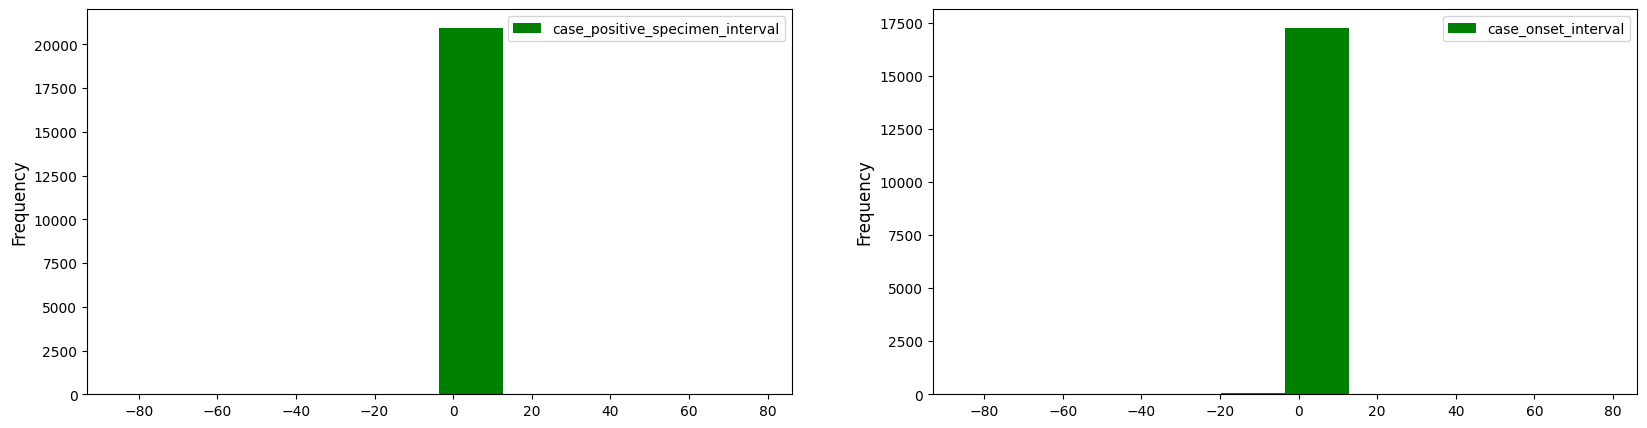

In [19]:
# Plot the histogram of all continuous features in the same figure
df[continuous_features].plot(kind='hist', subplots=True, figsize=(20,5), layout=(1,2), sharex=False, sharey=False, color = 'green')

### Boxplots for all the continuous features.

case_positive_specimen_interval       AxesSubplot(0.125,0.11;0.352273x0.77)
case_onset_interval                AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

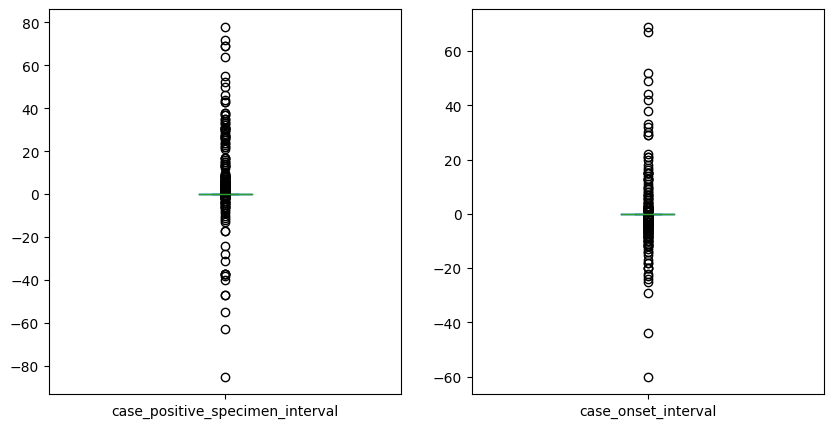

In [20]:
# Plot the histogram of all continuous features in the same figure
df[continuous_features].plot(kind='box',subplots=True, figsize=(10,5), layout=(1,2), sharex=False, sharey=False)

### Initial findings about continuous features

- The table shows that there are many NULL values
- The histograms and boxplots show that there are many outliers, and the reason for that is because most values of these 2 features (if Not Null) are 0:

In [21]:
# Calculate the proportion of NULL and 0 values among the features

for col in continuous_features:
    print("Feature:", col, "\t")
    print(len(df[df[col].isnull()]),"occurrences of NULL values (=", round((((len(df[df[col].isnull()]))/len(df[col]))*100),2), "% of values)")
    print(len(df[df[col]==0]),"occurrences of 0 (=", round((((len(df[df[col]==0]))/(len(df[col])-len(df[df[col].isnull()])))*100),2), "% of Non-Null values)")
    print("\n")

Feature: case_positive_specimen_interval 	
18946 occurrences of NULL values (= 47.37 % of values)
18674 occurrences of 0 (= 88.7 % of Non-Null values)


Feature: case_onset_interval 	
22621 occurrences of NULL values (= 56.55 % of values)
16756 occurrences of 0 (= 96.42 % of Non-Null values)




#### For NULL values of case_onset_interval, the result can be because there is no available information about the symptom_status of the case, or the case is Asymptomatic.

In [22]:
# Checking the validity of missing values in case_onset_interval feature, 
# using its logical relationship with symptom_status
null_onset = df[df['case_onset_interval'].isnull()]
print("Total number of NULL case_onset_interval rows: ",null_onset.shape[0],", of which:")

print("\n")
print("1. Need investigation: ")
print("The number of cases having Symptomatic symptom_status: ",null_onset[(null_onset['symptom_status']=='Symptomatic')].shape[0]
     ,"(",round(100*null_onset[(null_onset['symptom_status']=='Symptomatic')].shape[0]/null_onset.shape[0],2),'% of NULL case_onset_interval rows,'
     ,round(100*null_onset[(null_onset['symptom_status']=='Symptomatic')].shape[0]/df.shape[0],2),"% of Total rows )"
     )
print("\n")
print("2. Valid missing data: ")
print("The number of cases having Missing symptom_status: ",null_onset[(null_onset['symptom_status']=='Missing')].shape[0]
     ,"(",round(100*null_onset[(null_onset['symptom_status']=='Missing')].shape[0]/null_onset.shape[0],2),'% of NULL case_onset_interval rows,'
     ,round(100*null_onset[(null_onset['symptom_status']=='Missing')].shape[0]/df.shape[0],2),"% of Total rows )"
     )
print("The number of cases having Unknown symptom_status: ",null_onset[(null_onset['symptom_status']=='Unknown')].shape[0]
     ,"(",round(100*null_onset[(null_onset['symptom_status']=='Unknown')].shape[0]/null_onset.shape[0],2),'% of NULL case_onset_interval rows,'
     ,round(100*null_onset[(null_onset['symptom_status']=='Unknown')].shape[0]/df.shape[0],2),"% of Total rows )"
     )
print("The number of cases having Asymptomatic symptom_status: ",null_onset[(null_onset['symptom_status']=='Asymptomatic')].shape[0]
     ,"(",round(100*null_onset[(null_onset['symptom_status']=='Asymptomatic')].shape[0]/null_onset.shape[0],2),'% of NULL case_onset_interval rows,'
     ,round(100*null_onset[(null_onset['symptom_status']=='Asymptomatic')].shape[0]/df.shape[0],2),"% of Total rows )"
     )

Total number of NULL case_onset_interval rows:  22621 , of which:


1. Need investigation: 
The number of cases having Symptomatic symptom_status:  1406 ( 6.22 % of NULL case_onset_interval rows, 3.52 % of Total rows )


2. Valid missing data: 
The number of cases having Missing symptom_status:  16091 ( 71.13 % of NULL case_onset_interval rows, 40.23 % of Total rows )
The number of cases having Unknown symptom_status:  4494 ( 19.87 % of NULL case_onset_interval rows, 11.23 % of Total rows )
The number of cases having Asymptomatic symptom_status:  630 ( 2.79 % of NULL case_onset_interval rows, 1.57 % of Total rows )


#### If not including valid missing cases, the actual %missing of case_onset_interval is only 3.39%

### 1.3.2 Categorical features: 

In [23]:
# Look once again at the summary stats table for categorical features
df_categorical_info = df[categorical_features].describe().T

In [24]:
# Checking % of missing values and storing the results in a dataframe
categorical_missing = 100 * (df[categorical_features].isnull().sum()/df.shape[0])
df_categorical_missing = pd.DataFrame(categorical_missing, columns=['%missing'])

In [25]:
# Checking cardinality and storing the results in a dataframe
categorical_card = df[categorical_features].nunique()
df_categorical_card = pd.DataFrame(categorical_card, columns=['card'])

In [26]:
# Putting the columns together to prepare the final table for categorical features
df_categorical_data_quality_report_table = pd.concat([df_categorical_info, df_categorical_missing, df_categorical_card], axis=1)

All categorical features have cardinality > 1; therefore, there is no constant feature among them.

### 1.3.3 Datetime features: case_month

In [27]:
# Look at the continuous_features
datetime_features = df.select_dtypes(['datetime64[ns]']).columns
df_datetime_info = df[datetime_features].describe().T

In [28]:
# Checking % of missing values and storing the results in a dataframe
datetime_missing = 100 * (df[datetime_features].isnull().sum()/df.shape[0])
df_datetime_missing = pd.DataFrame(datetime_missing, columns=['%missing'])

In [29]:
# Checking cardinality and storing the results in a dataframe
datetime_card = df[datetime_features].nunique()
df_datetime_card = pd.DataFrame(datetime_card, columns=['card'])

In [30]:
# Putting the columns together to prepare the final table for categorical features
df_datetime_data_quality_report_table = pd.concat([df_datetime_info, df_datetime_missing, df_datetime_card], axis=1)

## 1.4. Check integrity

The following checks will be performed to see if the data makes sense. Depending on the amount of data affected we may decide to drop those rows or replace the values upon consultation with a domain expert.

- 1. 1 *state_fips_code* represents only 1 *res_state*
- 2. 1 *county_fips_code* represents only 1 *res_county*
- 3. 1 *county_fips_code* belongs to only 1 *state_fips_codes*
- 4. When *symptom_status* == “Missing”, *case_onset_interval* == NaN
- 5. When *symptom_status* == “Unknown” or "Asymptomatic", *case_onset_interval* == NaN
- 6. When *case_onset_inteval* is Not Null, *symptom_status* == 'Symptomatic'

### Results: 
- 1. Passed. *state_fips_code* is the unique identifier for the state of residence
- 2. Passed. *county_fips_code* is the unique identifier for the county of residence
- 3. Passed. 1 *county_fips_code* belongs to only 1 *state_fips_codes*
- 4. Failed. 263 (3.19%) rows that have "Missing" *symptom_status* still have case_onset_interval of 0 week. 
- 5. Passed. When *symptom_status* is “Unknown”/Asymptomatic, *case_onset_interval* is blank.
- 6. Failed. 263 same rows of Test_4: have case_onset_interval not null (=0) but *symptom_status* == 'Missing'

### Solutions for 4,6: 
- Option 1: Replace *symptom_status* = “Missing” to *symptom_status* = “Symptomatic”
- Option 2: Replace *case_onset_interval* = 0 to *case_onset_interval* = NULL

### But the number of affected rows is quite high and there is limited access to domain expertise to validate the solution. Therefore, the data is kept as initial. 

In [31]:
test_1 = pd.pivot_table(df[['state_fips_code','res_state']], index='state_fips_code', aggfunc=pd.Series.nunique)
print("Total number of state_fips_code: ",test_1.shape[0])
print("Number of state_fips_code passing the test: ",test_1[test_1['res_state']==1].shape[0])
print("Number of state_fips_code failing the test", test_1[test_1['res_state']>1].shape[0])

Total number of state_fips_code:  49
Number of state_fips_code passing the test:  49
Number of state_fips_code failing the test 0


In [32]:
test_2 = pd.pivot_table(df[['county_fips_code','res_county']], index='county_fips_code', aggfunc=pd.Series.nunique)
print("Total number of county_fips_code: ",test_2.shape[0])
print("Number of county_fips_code passing the test: ",test_2[test_2['res_county']==1].shape[0])
print("Number of county_fips_code failing the test:", test_2[test_2['res_county']>1].shape[0])

Total number of county_fips_code:  1331
Number of county_fips_code passing the test:  1331
Number of county_fips_code failing the test: 0


In [33]:
test_3 = pd.pivot_table(df[['county_fips_code','state_fips_code']], index='county_fips_code', aggfunc=pd.Series.nunique)
print("Total number of county_fips_code: ",test_3.shape[0])
print("Number of county_fips_code passing the test: ",test_3[test_3['state_fips_code']==1].shape[0])
print("Number of county_fips_code failing the test", test_3[test_3['state_fips_code']>1].shape[0])

Total number of county_fips_code:  1331
Number of county_fips_code passing the test:  1331
Number of county_fips_code failing the test 0


In [34]:
test_4 = df[(df['symptom_status']=='Missing')]

print("Total number of rows with Missing symptom_status: ",test_4.shape[0])
test_4_failed = test_4.dropna(subset=['case_onset_interval'])

print("Of which, number of rows with not-null value of case_onset_interval: ",test_4_failed.shape[0],
     "(",round(100*test_4_failed.shape[0]/test_4.shape[0],2),"% of total rows )")
print("The values of case_onset_interval in these rows are:",test_4_failed['case_onset_interval'].drop_duplicates().values)

Total number of rows with Missing symptom_status:  16596
Of which, number of rows with not-null value of case_onset_interval:  505 ( 3.04 % of total rows )
The values of case_onset_interval in these rows are: [0.]


In [35]:
test_5 = df[(df['symptom_status']=='Unknown')|(df['symptom_status']=='Asymptomatic')]

print("Total number of rows with Asymptomatic/Unknown symptom_status: ",test_5.shape[0])
test_5_failed = test_5.dropna(subset=['case_onset_interval'])

print("Of which, number of rows with not-null value of case_onset_interval: ",test_5_failed.shape[0],
     "(",round(100*test_5_failed.shape[0]/test_5.shape[0],2),"% of total rows )")
print("The values of case_onset_interval in these rows are:",test_5_failed['case_onset_interval'].drop_duplicates().values)

Total number of rows with Asymptomatic/Unknown symptom_status:  5124
Of which, number of rows with not-null value of case_onset_interval:  0 ( 0.0 % of total rows )
The values of case_onset_interval in these rows are: []


In [36]:
test_6 = df.dropna(subset=['case_onset_interval'])
test_6_failed = test_6[test_6['symptom_status']!='Symptomatic']
print("Total number of rows with Not Null case_onset_interval: ",test_6.shape[0])
print("Of which, number of rows with symptom_status is not 'Symptomatic': ",test_6_failed.shape[0])
print("The values of case_onset_interval in these rows are: ",test_6_failed['symptom_status'].drop_duplicates().values)

Total number of rows with Not Null case_onset_interval:  17379
Of which, number of rows with symptom_status is not 'Symptomatic':  505
The values of case_onset_interval in these rows are:  ['Missing']
Categories (4, object): ['Asymptomatic', 'Missing', 'Symptomatic', 'Unknown']


### Initial Findings
- underlying_conditions_yn has extremely high %missing. Considering dropping the feature
- Some other categorical features also has missing values but low %missing. Considering applying imputation
- symptom_status: 505 rows has symptom_status = 'Missing' but case_onset_interval = 0. The number of affected rows is quite high and there is limited access to domain expertise to validate the solution. Therefore, the data is kept as initial. 

# 2. Data Quality Plan

|Variable Names|Data Quality Issue|Handling Strategy|Justification
|-|-|-|-
|case_month|No issue|-|-
|case_positive_specimen_interval|47% Missing|Drop|Too many are missing. Imputation can affect the prediction
|case_positive_specimen_interval|Outliers|Drop|89% non-missing values are 0, making all values that are different from 0 become ‘outliers’. Extraordinarily high frequency of 0 might be a serious error in data integration or manual entry
|case_onset_interval|57% Missing||Only 3.04% is Invalid Missing, 53.96% is Valid Missing because the case is asymptomatic
|case_onset_interval|Outliers|Drop|96% non-missing values are 0, making all values that are different from 0 become ‘outliers’. Extraordinarily high frequency of 0 might be a serious error in data integration or manual entry. Part of the information is already reflected in feature symptom_status
|res_state|0.0025% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|state_fips_code|0.0025% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|res_county	37583|6.0425% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|county_fips_code|6.0425% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|age_group|0.6400% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|sex|1.9700% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|race|11.6625% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|ethnicity|12.6775% Missing|Imputed as 'Missing'|Match with CDC encoding when data is not provided
|process|No issue|Leave as is|CDC encodes non-provided data to 'Missing', not that the actual dataset is missing
|exposure_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing
|current_status|No issue|Leave as is|-|
|symptom_status|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing.
|hosp_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing
|icu_yn|No issue|Leave as is|CDC encode non-provided data to 'Missing', not that the actual dataset is missing 
|death_yn|No issue|Leave as is|-|
|underlying_conditions_yn|91.3225% Missing|Drop features|Too many are missing


# 3 Apply solutions to obtain a new CSV file

In [37]:
# Save in a new dataframe in case there is need to use the old one.
# drop underlying_conditions_yn
df_new = df.drop(columns = ["underlying_conditions_yn","case_positive_specimen_interval","case_onset_interval"])

# For features that haven't got "Missing" values in categories, add a new category before replacement, then replace
for column in ['res_state','state_fips_code','res_county','county_fips_code']:
    df_new[column]=df_new[column].cat.add_categories(['Missing'])
    df_new[column]=df_new[column].fillna('Missing')
# For features that already have "Missing" values in categories, replace
for column in ['age_group','sex','race','ethnicity']:
    df_new[column]=df_new[column].fillna('Missing')
print(df_new.isnull().sum())

case_month          0
res_state           0
state_fips_code     0
res_county          0
county_fips_code    0
age_group           0
sex                 0
race                0
ethnicity           0
process             0
exposure_yn         0
current_status      0
symptom_status      0
hosp_yn             0
icu_yn              0
death_yn            0
dtype: int64


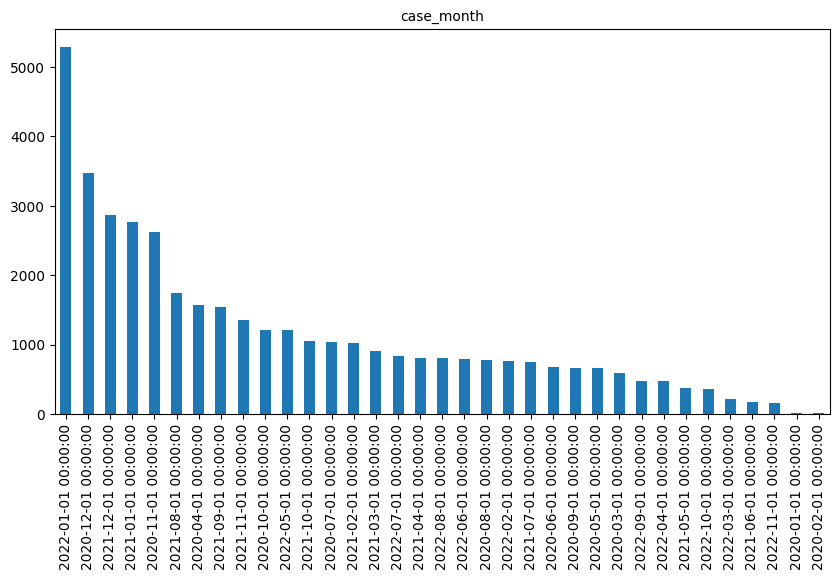

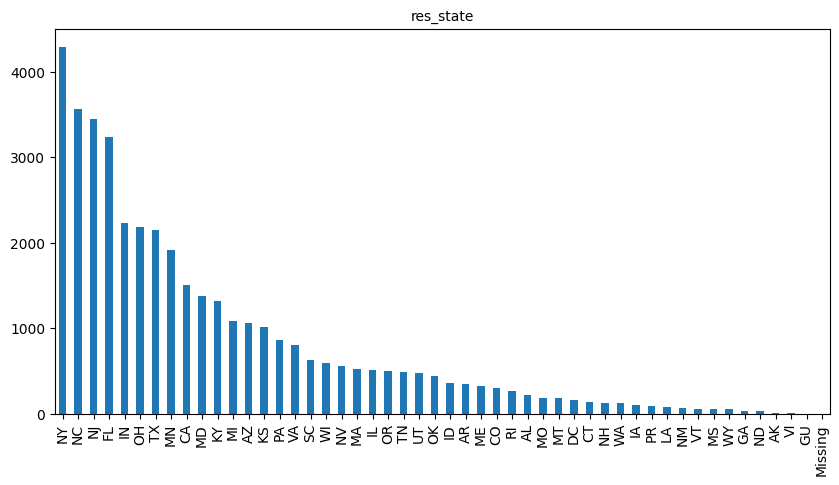

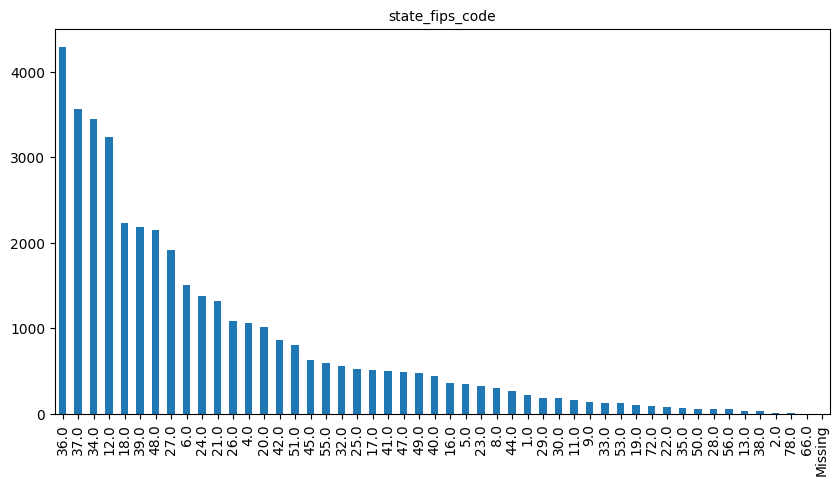

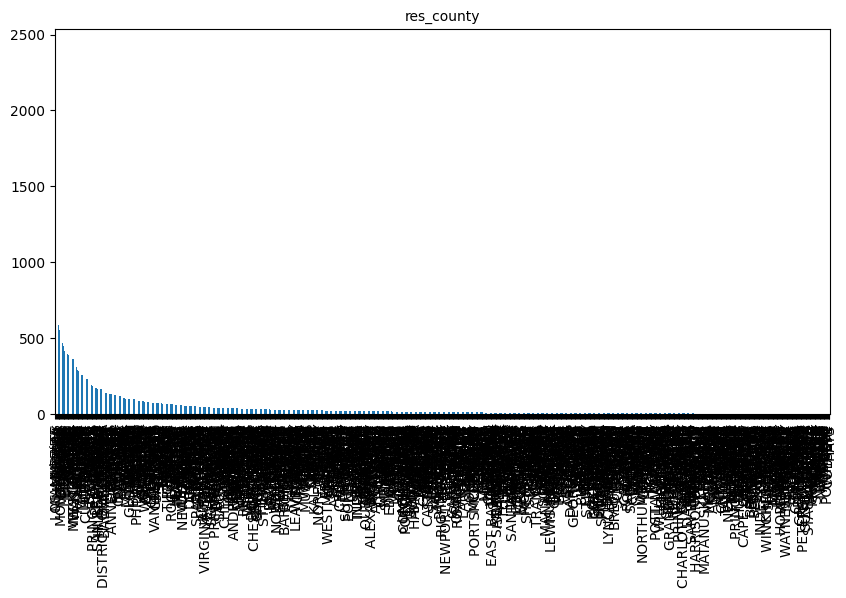

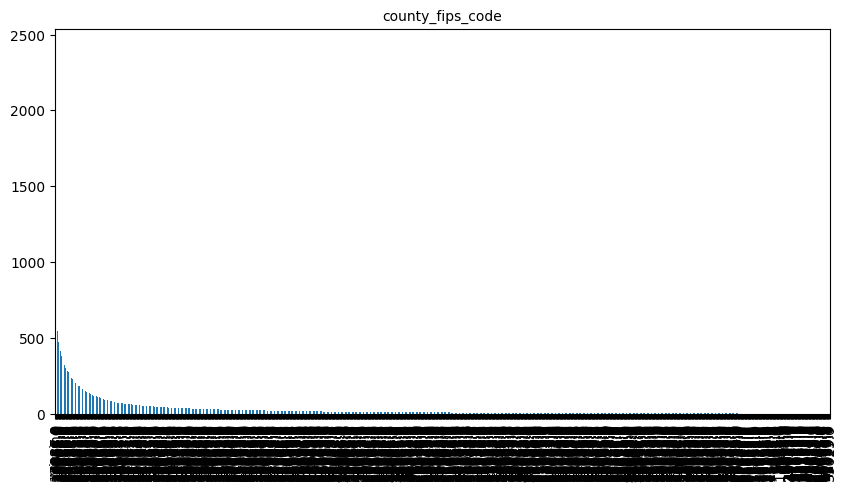

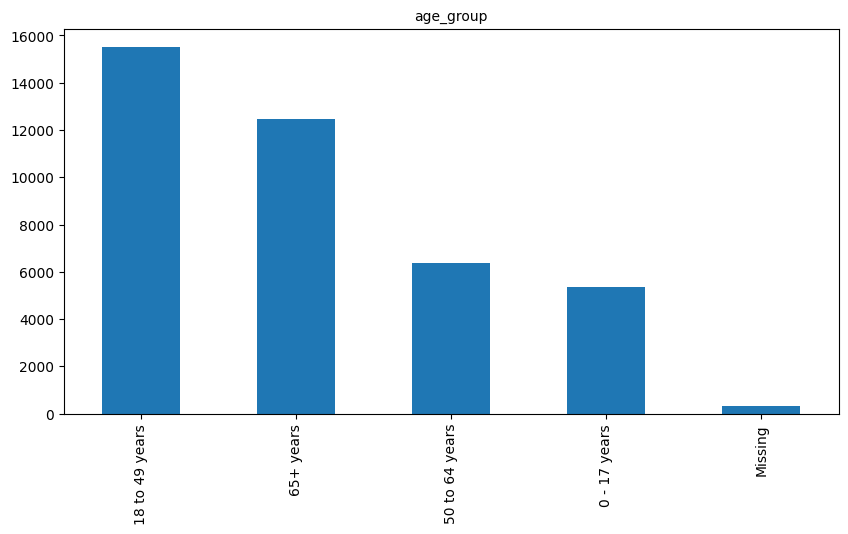

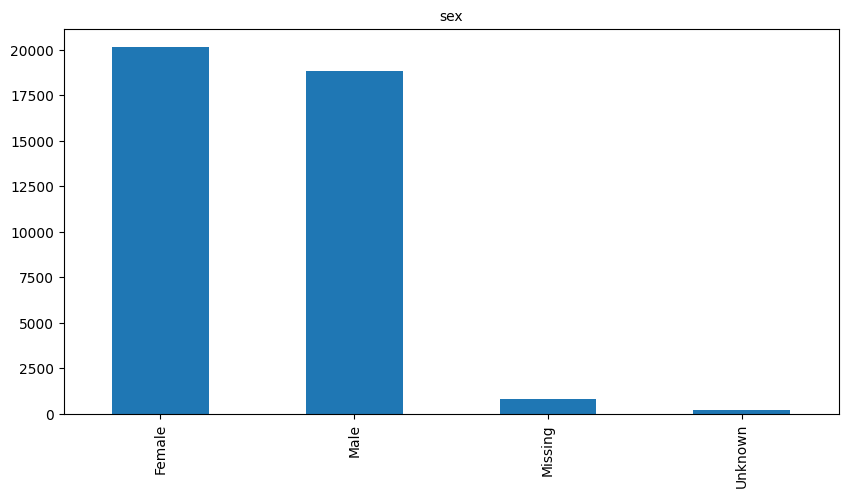

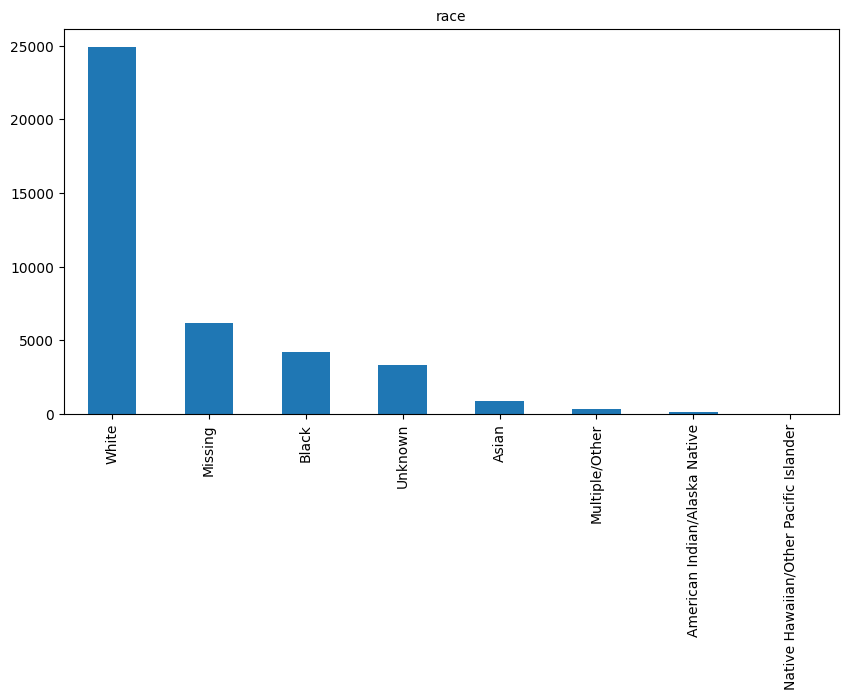

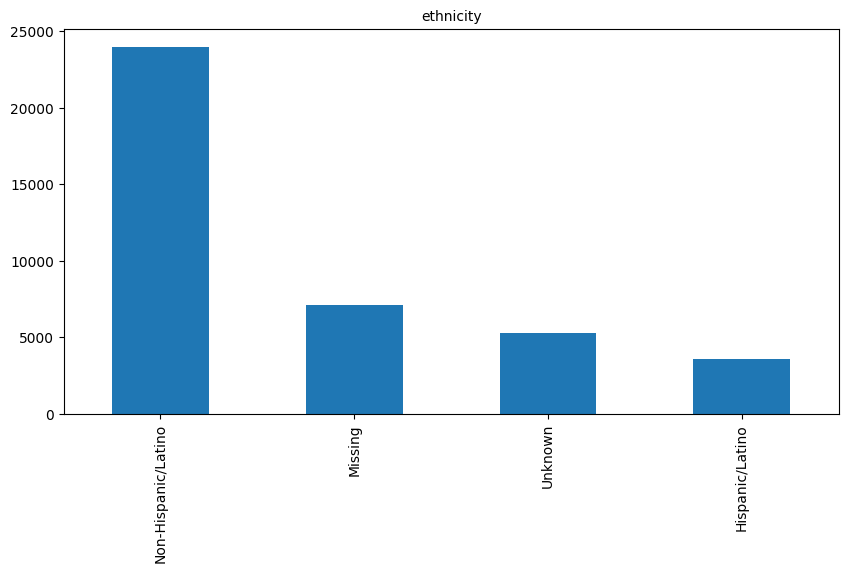

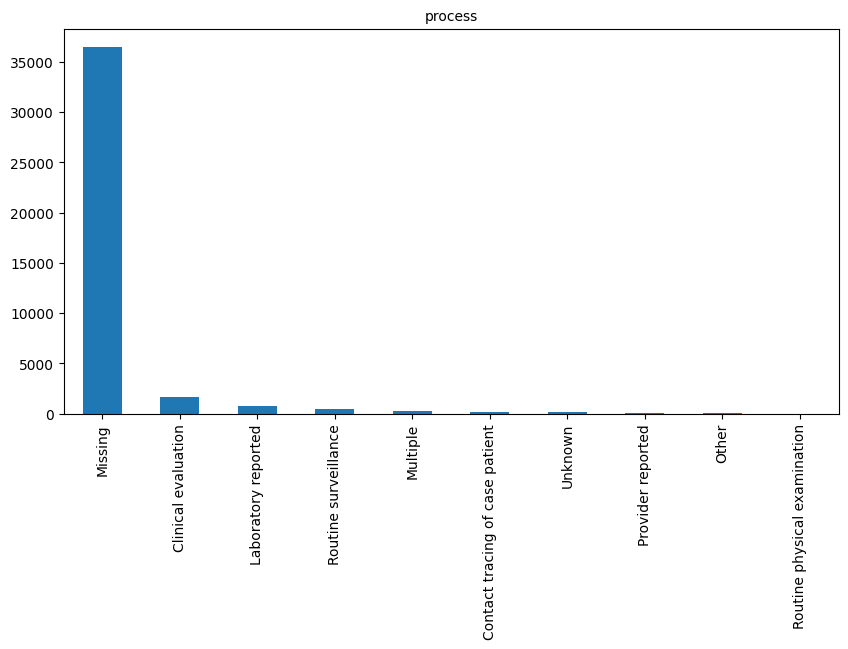

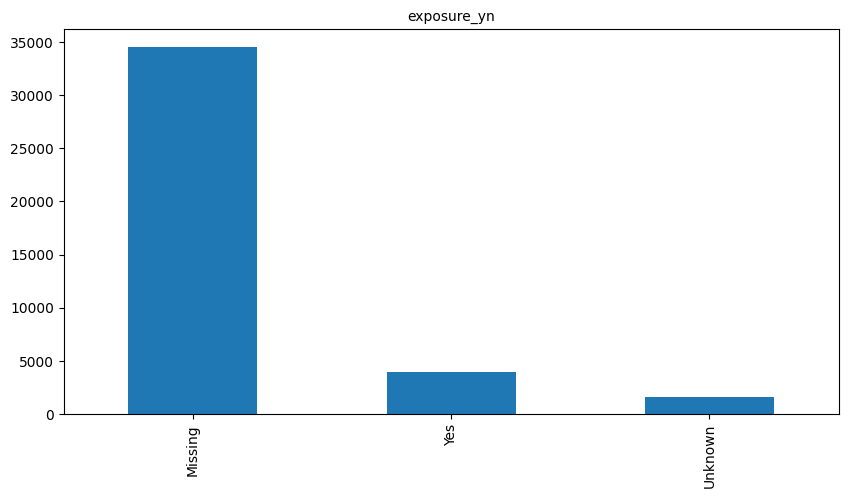

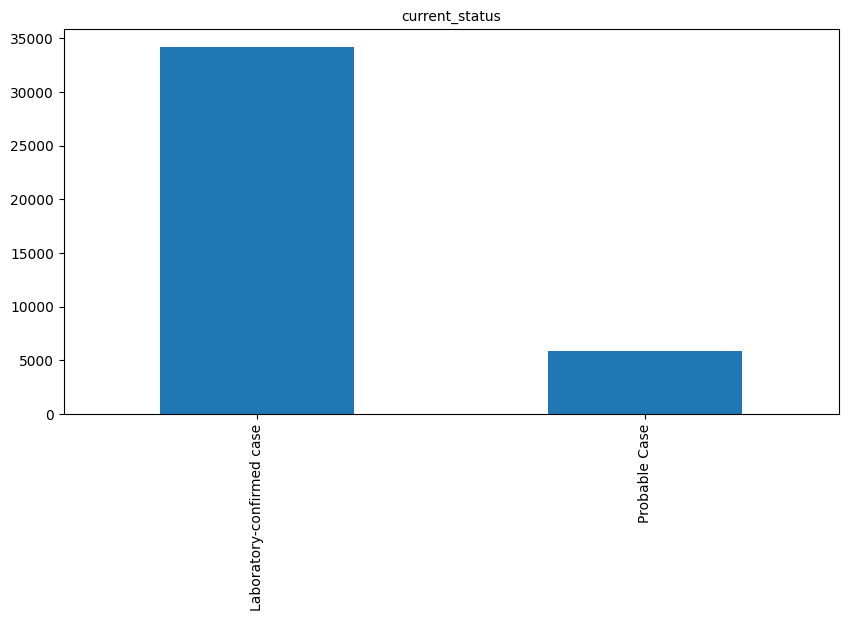

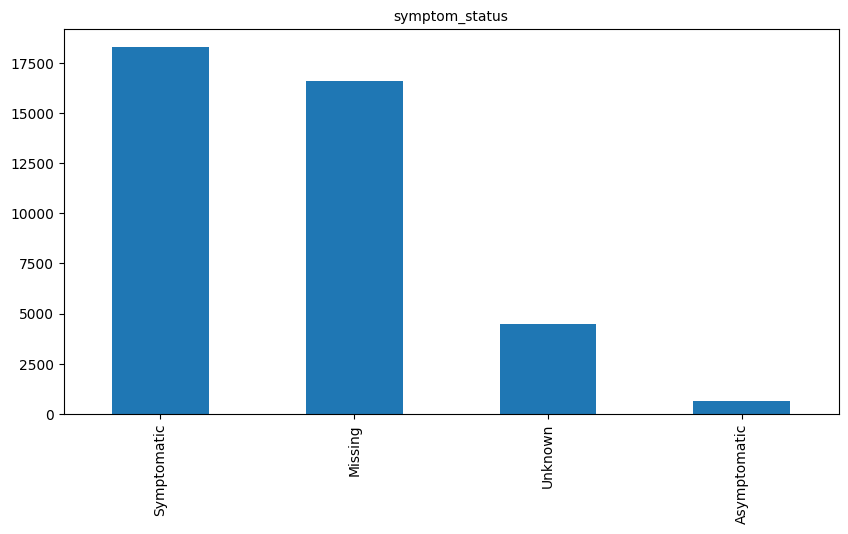

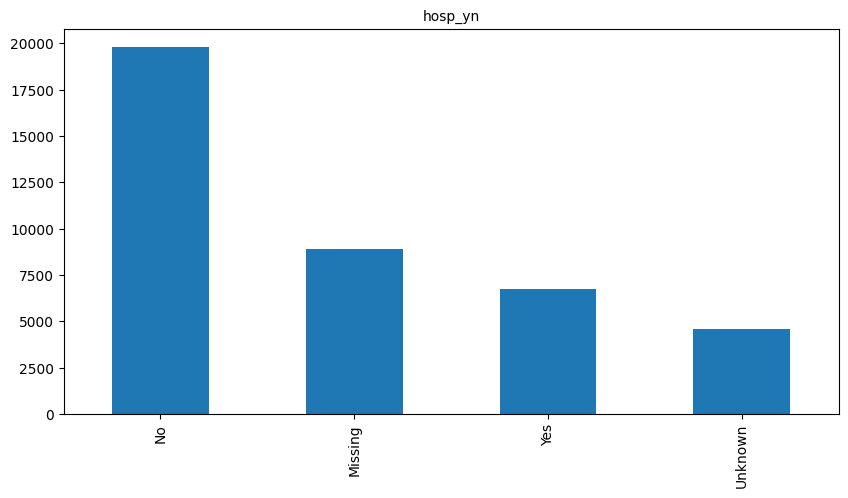

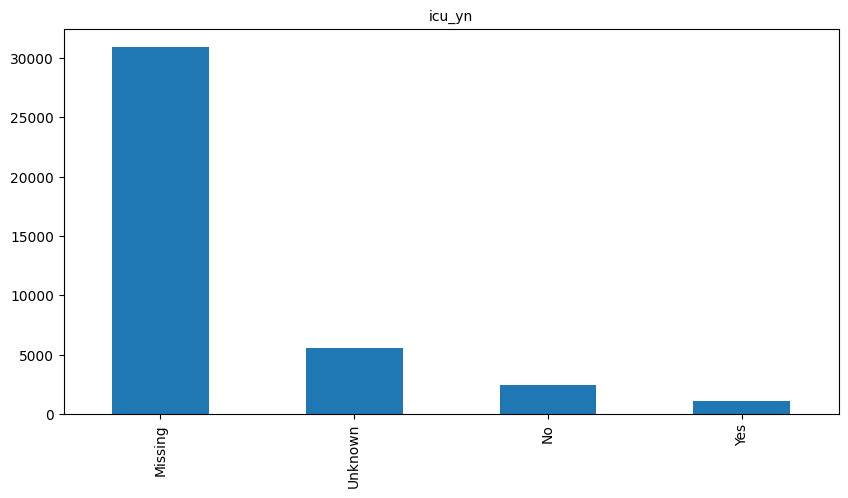

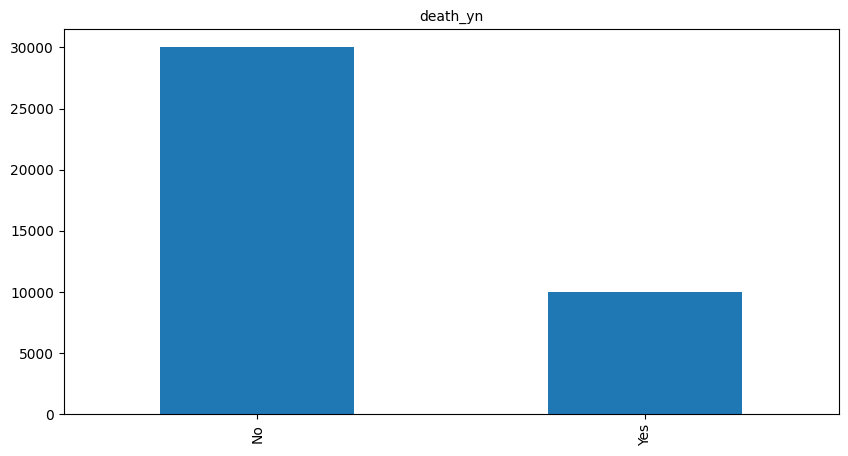

In [38]:
# Bar chart for all features
for column in df_new.columns:
    f = df_new[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(10,5))
    plt.show()


In [39]:
# Save the data after solving quality issues to a new csv
df_new.to_csv("covid19-cdc-cleaned-22201371-22202474-utf8.csv", index=False)